# Case 1 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./data/dataset.xlsx')

In [3]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What is the primary key?

In [4]:
data.shape

(5644, 111)

In [5]:
data['Patient ID'].nunique()

5644

Each patient ID is unique, therefore we can assume that each observation is a new unique patient with no repeating patients. This makes `Patient ID` a primary key.

## EDA on variables 1-22

In [6]:
df = data.iloc[:,0:22]
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Respiratory Syncytial Virus'],
      dtype='object')

In [7]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

### Patient age quantile

Based on the histogram and table of counts below it looks like the age of the patients is distributed fairly evenly across the different quantiles.

(array([568., 566., 660., 600., 526., 570., 510., 568., 542., 534.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

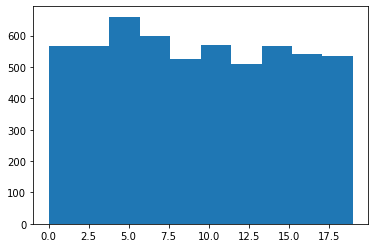

In [8]:
plt.hist(df['Patient age quantile'])

In [9]:
t1 = pd.DataFrame(df['Patient age quantile'].value_counts(sort = False).reset_index())
t1.columns = ['Patient age quantile', 'Frequency']
t1

,Patient age quantile,Frequency
0,0,334
1,4,366
2,8,167
3,12,197
4,16,279
5,1,234
6,5,294
7,9,359
8,13,313
9,17,263


### SARS-Cov-2 exam result

There are 5,086 negative and 558 positive patients.

(array([5086.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         558.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

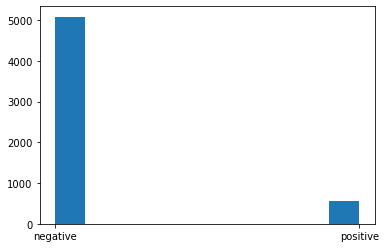

In [10]:
plt.hist(df['SARS-Cov-2 exam result'])

In [11]:
t2 = pd.DataFrame(df['SARS-Cov-2 exam result'].value_counts(sort = False).reset_index())
t2.columns = ['SARS-Cov-2 exam result', 'Frequency']
t2

,SARS-Cov-2 exam result,Frequency
0,negative,5086
1,positive,558


### Patient addmited to wards

(array([5565.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          79.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

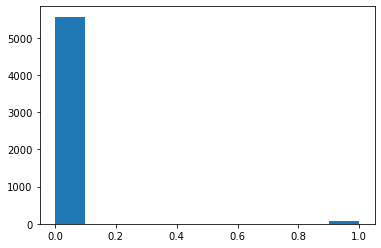

In [12]:
plt.hist(df['Patient addmited to regular ward (1=yes, 0=no)'])

In [13]:
t3 = pd.DataFrame(df['Patient addmited to regular ward (1=yes, 0=no)'].value_counts(sort = False).reset_index())
t3.columns = ['Patient addmited to regular ward (1=yes, 0=no)', 'Frequency']
t3

,"Patient addmited to regular ward (1=yes, 0=no)",Frequency
0,0,5565
1,1,79


(array([5594.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

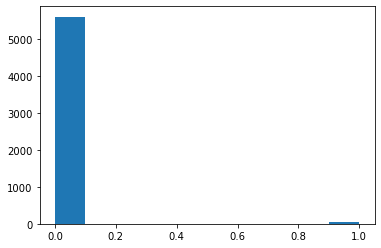

In [14]:
plt.hist(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'])

In [15]:
t4 = pd.DataFrame(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'].value_counts(sort = False).reset_index())
t4.columns = ['Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Frequency']
t4

,"Patient addmited to semi-intensive unit (1=yes, 0=no)",Frequency
0,0,5594
1,1,50


(array([5603.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          41.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

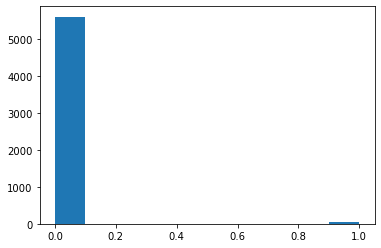

In [16]:
plt.hist(df['Patient addmited to intensive care unit (1=yes, 0=no)'])

In [17]:
t5 = pd.DataFrame(df['Patient addmited to intensive care unit (1=yes, 0=no)'].value_counts(sort = False).reset_index())
t5.columns = ['Patient addmited to intensive care unit (1=yes, 0=no)', 'Frequency']
t5

,"Patient addmited to intensive care unit (1=yes, 0=no)",Frequency
0,0,5603
1,1,41


In [18]:
ward = pd.DataFrame({'ward': ['Regular','Semi-intensive','Intensive'], 'number admitted': [79, 50, 41]})
ward

,ward,number admitted
0,Regular,79
1,Semi-intensive,50
2,Intensive,41


<BarContainer object of 3 artists>

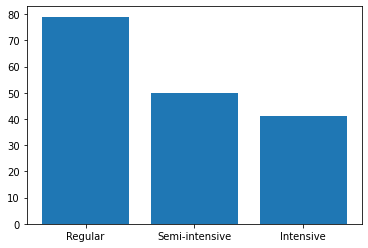

In [19]:
plt.bar(ward['ward'], ward['number admitted'])

In [20]:
ward['number admitted'].sum()

170

There were a total of 170 patient admitted to a ward. With 558 total covid positive cases we know that most of covid positive patients did not get admitted to any ward. We will have to do further analysis to understand whether a covid test result is a good determinant of which ward a patient is admitted into.

### Lab test Result Columns

It looks like all of these columns are missing a lot of values. We will have to see if there is less missing data in covid positive patients and those that are admitted into wards to see if any of these variables will be useful.

They were also all normalized so they have extremely similar density plots and there is not much we can say about their original distributions.

In [21]:
(df.iloc[:,6:22]).isnull().sum()/5664

Hematocrit                                          0.890007
Hemoglobin                                          0.890007
Platelets                                           0.890184
Mean platelet volume                                0.890713
Red blood Cells                                     0.890184
Lymphocytes                                         0.890184
Mean corpuscular hemoglobin concentration (MCHC)    0.890184
Leukocytes                                          0.890184
Basophils                                           0.890184
Mean corpuscular hemoglobin (MCH)                   0.890184
Eosinophils                                         0.890184
Mean corpuscular volume (MCV)                       0.890184
Monocytes                                           0.890360
Red blood cell distribution width (RDW)             0.890184
Serum Glucose                                       0.959746
Respiratory Syncytial Virus                         0.757415
dtype: float64

In [22]:
df['Respiratory Syncytial Virus'].value_counts()

not_detected    1302
detected          52
Name: Respiratory Syncytial Virus, dtype: int64

<AxesSubplot:ylabel='Density'>

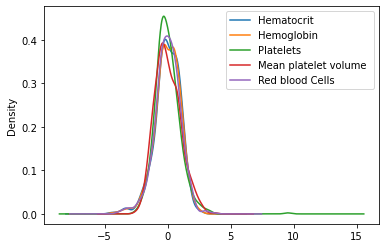

In [23]:
(df.iloc[:,6:11]).plot.density()

<AxesSubplot:ylabel='Density'>

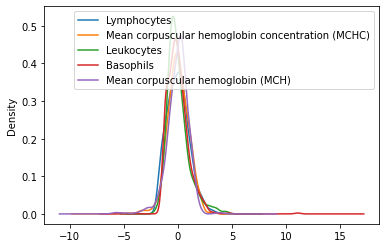

In [24]:
(df.iloc[:,11:16]).plot.density()

<AxesSubplot:ylabel='Density'>

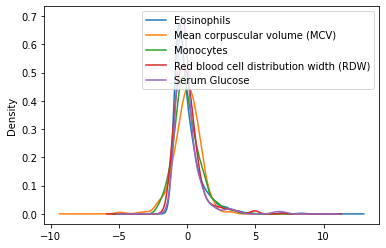

In [25]:
(df.iloc[:,16:22]).plot.density()